In [28]:
# 1. Load the data file and libraries

import os
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale
from sklearn import neighbors, linear_model
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import classification_report
%matplotlib inline

red_wine = pd.read_csv("winequality-red.csv", sep=';')

In [20]:
original_outcome = red_wine['quality'].values

good_wine = original_outcome >= 6 # this converts values to either true or false
# convert to 0 and 1
good_wine = good_wine*1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b545748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10c288da0>]], dtype=object)

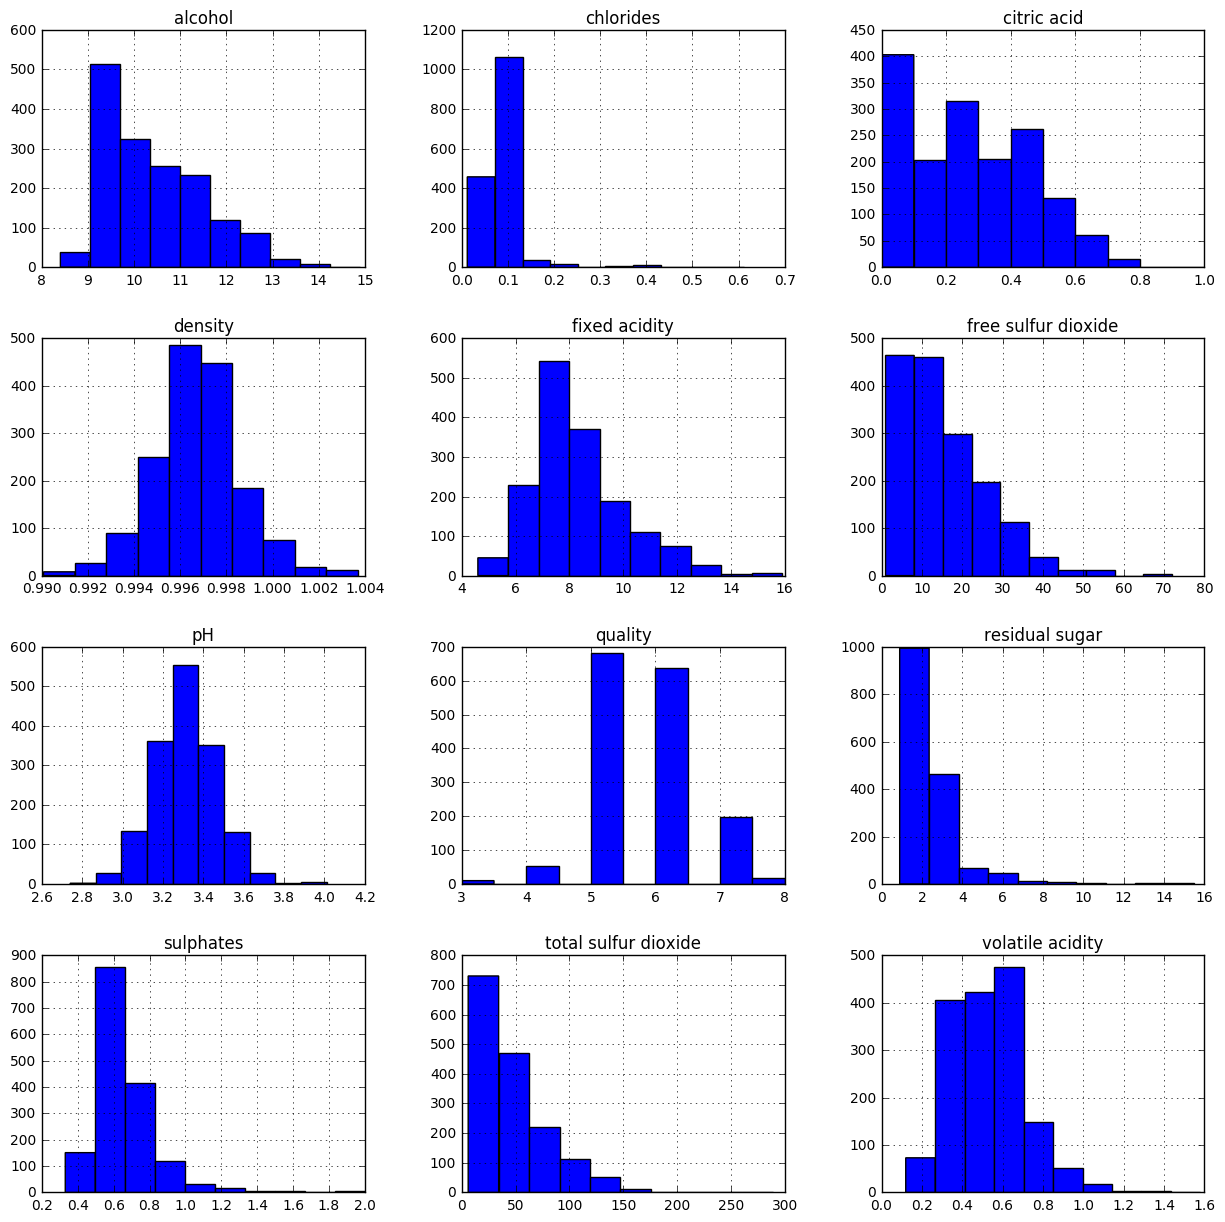

In [21]:
pd.DataFrame.hist(red_wine, figsize=[15,15])

In [22]:
# 4. Normalize the data

# We notice the outliers in our data: few samples with very good quality = 8
# and few samples with very poor quality = 3.
# This issue has been taken care of using the new binary variable which classifies
# the data as either good or bad.
# Another issue is the different scales used to measure these variables;
# take for example chlorides (ranges between 0.012 and 0.6)
# and total sulfur dioxide (ranges between 6 and 289).
# As a result, we need to scale/standardize the input data.
input_cols = list(red_wine.ix[:, red_wine.columns != 'quality'].columns)


In [23]:
red_transform = pd.DataFrame()
for col in input_cols:
    red_transform[col + '_zscore'] = (red_wine[col] - red_wine[col].mean()) / red_wine[col].std()

predictors_z = red_transform.values

In [26]:
Z_train, Z_test, y_train, y_test = train_test_split(predictors_z, good_wine,
                                                    test_size=0.5,
                                                    random_state=42)

# The data is now a standard normal distribution centered around zero (mean = 0)
# with standard deviation = 1.

In [30]:
# 5. Train the k-Nearest Neighbours classifiers
acc_dict = dict()
for i in np.arange(1, 500, 5):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(Z_train, y_train)
    accuracy = model.score(Z_test, y_test)
    acc_dict[i] = round(float(accuracy),3)


{1: 0.719,
 6: 0.713,
 11: 0.694,
 16: 0.677,
 21: 0.688,
 26: 0.695,
 31: 0.706,
 36: 0.709,
 41: 0.708,
 46: 0.726,
 51: 0.718,
 56: 0.716,
 61: 0.713,
 66: 0.725,
 71: 0.715,
 76: 0.718,
 81: 0.72,
 86: 0.728,
 91: 0.725,
 96: 0.719,
 101: 0.716,
 106: 0.718,
 111: 0.719,
 116: 0.721,
 121: 0.72,
 126: 0.721,
 131: 0.724,
 136: 0.72,
 141: 0.713,
 146: 0.71,
 151: 0.718,
 156: 0.718,
 161: 0.71,
 166: 0.71,
 171: 0.716,
 176: 0.721,
 181: 0.72,
 186: 0.718,
 191: 0.72,
 196: 0.72,
 201: 0.719,
 206: 0.715,
 211: 0.718,
 216: 0.721,
 221: 0.719,
 226: 0.723,
 231: 0.723,
 236: 0.726,
 241: 0.725,
 246: 0.72,
 251: 0.721,
 256: 0.72,
 261: 0.721,
 266: 0.72,
 271: 0.724,
 276: 0.719,
 281: 0.72,
 286: 0.718,
 291: 0.719,
 296: 0.719,
 301: 0.715,
 306: 0.715,
 311: 0.716,
 316: 0.711,
 321: 0.713,
 326: 0.715,
 331: 0.709,
 336: 0.715,
 341: 0.708,
 346: 0.705,
 351: 0.709,
 356: 0.708,
 361: 0.704,
 366: 0.7,
 371: 0.698,
 376: 0.696,
 381: 0.699,
 386: 0.693,
 391: 0.696,
 396: 0.69

In [31]:
# k with highest accuracy
max(acc_dict, key=acc_dict.get) # k = 86

86

In [32]:
# 6. Evaluate each classifier using 5-fold cross validation
kfold = KFold(1599, n_folds=5)
for iteration, data in enumerate(kfold, start=1):
    print(iteration, data[0], data[1])

1 [ 320  321  322 ..., 1596 1597 1598] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236

In [34]:
# 5-fold cross validation with k = 5
# use classification accuracy as the evaluation metric
# find the optimal k
scores_dict = dict()
for i in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, predictors_z, good_wine, cv=5, scoring='accuracy')
    #print(scores)
    #print(scores.mean())
    scores_dict[i] = round(float(scores.mean()),3)

In [36]:
max(scores_dict, key=scores_dict.get) # k = 86

111

In [37]:
# We also get k=86!
scores_dict[max(scores_dict, key=scores_dict.get)] # Cross-Validated accuracy for optimal k

0.735

In [38]:
# 7. Predict the generalisation error using the test data set
knn = neighbors.KNeighborsClassifier(n_neighbors=max(scores_dict, key=scores_dict.get))
model = knn.fit(Z_train, y_train)
y_true, y_pred = y_test, model.predict(Z_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.75      0.63      0.68       386
          1       0.70      0.80      0.75       414

avg / total       0.72      0.72      0.72       800

